<a href="https://colab.research.google.com/github/sunshineluyao/ML-minihackthon-tutorial/blob/main/Mini_hackthon_tutorial_on_AI_%26_Finance_for_Emerging_Markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊  Complete Financial Data Analysis with AutoML & Machine Learning Models
This is a Google Colab-compatible script that performs:

- ✅ Data fetching from Yahoo Finance
- ✅ Preprocessing & Feature Engineering
- ✅ High-quality visualizations (Nature/Science journal level)
- ✅ Automated Machine Learning (AutoML)
- ✅ Linear Regression with Statsmodels
- ✅ Comparing Multiple ML Models
- ✅ Learning Curve Analysis

### 🚀 **Google Colab Case Study: Financial Data Analysis & AutoML**

To use this script, copy and paste it into a Google Colab notebook and run each section step by step.

## 🔹 **1. Install & Import Required Libraries**

In [1]:
!pip install yfinance pandas matplotlib seaborn numpy scikit-learn statsmodels pycaret

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from pycaret.regression import setup, compare_models

## 🔹 **2. Fetch Financial Data from Yahoo Finance**

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# High-quality plot settings
plt.style.use("seaborn-darkgrid")  # Professional style
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "font.family": "serif",
    "figure.dpi": 300  # High-resolution figures
})

# Select a stock ticker
ticker = "AAPL"

# Fetch historical data
df = yf.download(ticker, start="2015-01-01", end="2024-01-01")

# Print first few rows for debugging
print("Raw DataFrame:\n", df.head())
print("\nAvailable Columns:", df.columns)

# Detect available price column
price_col = 'Adj Close' if 'Adj Close' in df.columns else 'Close'

# Keep only necessary columns
df = df[[price_col]].rename(columns={price_col: 'Price'})

# Print processed DataFrame
print("\nProcessed DataFrame:\n", df.head())


[*********************100%***********************]  1 of 1 completed

Raw DataFrame:
 Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.347176  24.817061  23.906240  24.805925  212818400
2015-01-05  23.661272  24.195739  23.474210  24.115569  257142000
2015-01-06  23.663496  23.924048  23.300503  23.725850  263188400
2015-01-07  23.995310  24.095522  23.761480  23.872827  160423600
2015-01-08  24.917271  24.975172  24.206875  24.324905  237458000

Available Columns: MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

Processed DataFrame:
 Price           Price
Ticker           AAPL
Date                 
2015-01-02  24.347176
2015-01-05  23.661272
2015-01-06  23.663496
2015-01-07  23.995310
2015-01-08  24.917271


In [5]:
# Use 'Close' if 'Adj Close' is unavailable
price_col = 'Adj Close' if 'Adj Close' in df.columns else 'Close'

# Keep only the necessary column and rename it
df = df[[price_col]].rename(columns={price_col: 'Price'})
print("\nProcessed DataFrame:\n", df.head())



Processed DataFrame:
 Price           Price
Ticker           AAPL
Date                 
2015-01-02  24.347176
2015-01-05  23.661272
2015-01-06  23.663496
2015-01-07  23.995310
2015-01-08  24.917271


## 🔹 **3. Compute Features (Moving Averages, Returns)**

In [8]:
# Calculate daily returns
df['Daily Return'] = df['Price'].pct_change()

# Ensure no NaN issues
df.dropna(inplace=True)

# Compute moving averages
df['MA_10'] = df['Price'].rolling(window=10).mean()
df['MA_50'] = df['Price'].rolling(window=50).mean()

# Drop any remaining NaN values
df.dropna(inplace=True)

# Print processed DataFrame
print("\nProcessed DataFrame with Features:\n", df.head())



Processed DataFrame with Features:
 Price           Price Daily Return      MA_10      MA_50
Ticker           AAPL                                   
Date                                                    
2015-03-17  28.402740     0.016727  28.068946  26.788357
2015-03-18  28.722448     0.011256  28.067381  26.889581
2015-03-19  28.505583    -0.007550  28.091750  26.986422
2015-03-20  28.147869    -0.012549  28.076100  27.069473
2015-03-23  28.440748     0.010405  28.077665  27.139943


###  🔹 **4. High-Quality Visualization for Nature/Science Journal**
📊 (A) Stock Price & Moving Averages
python


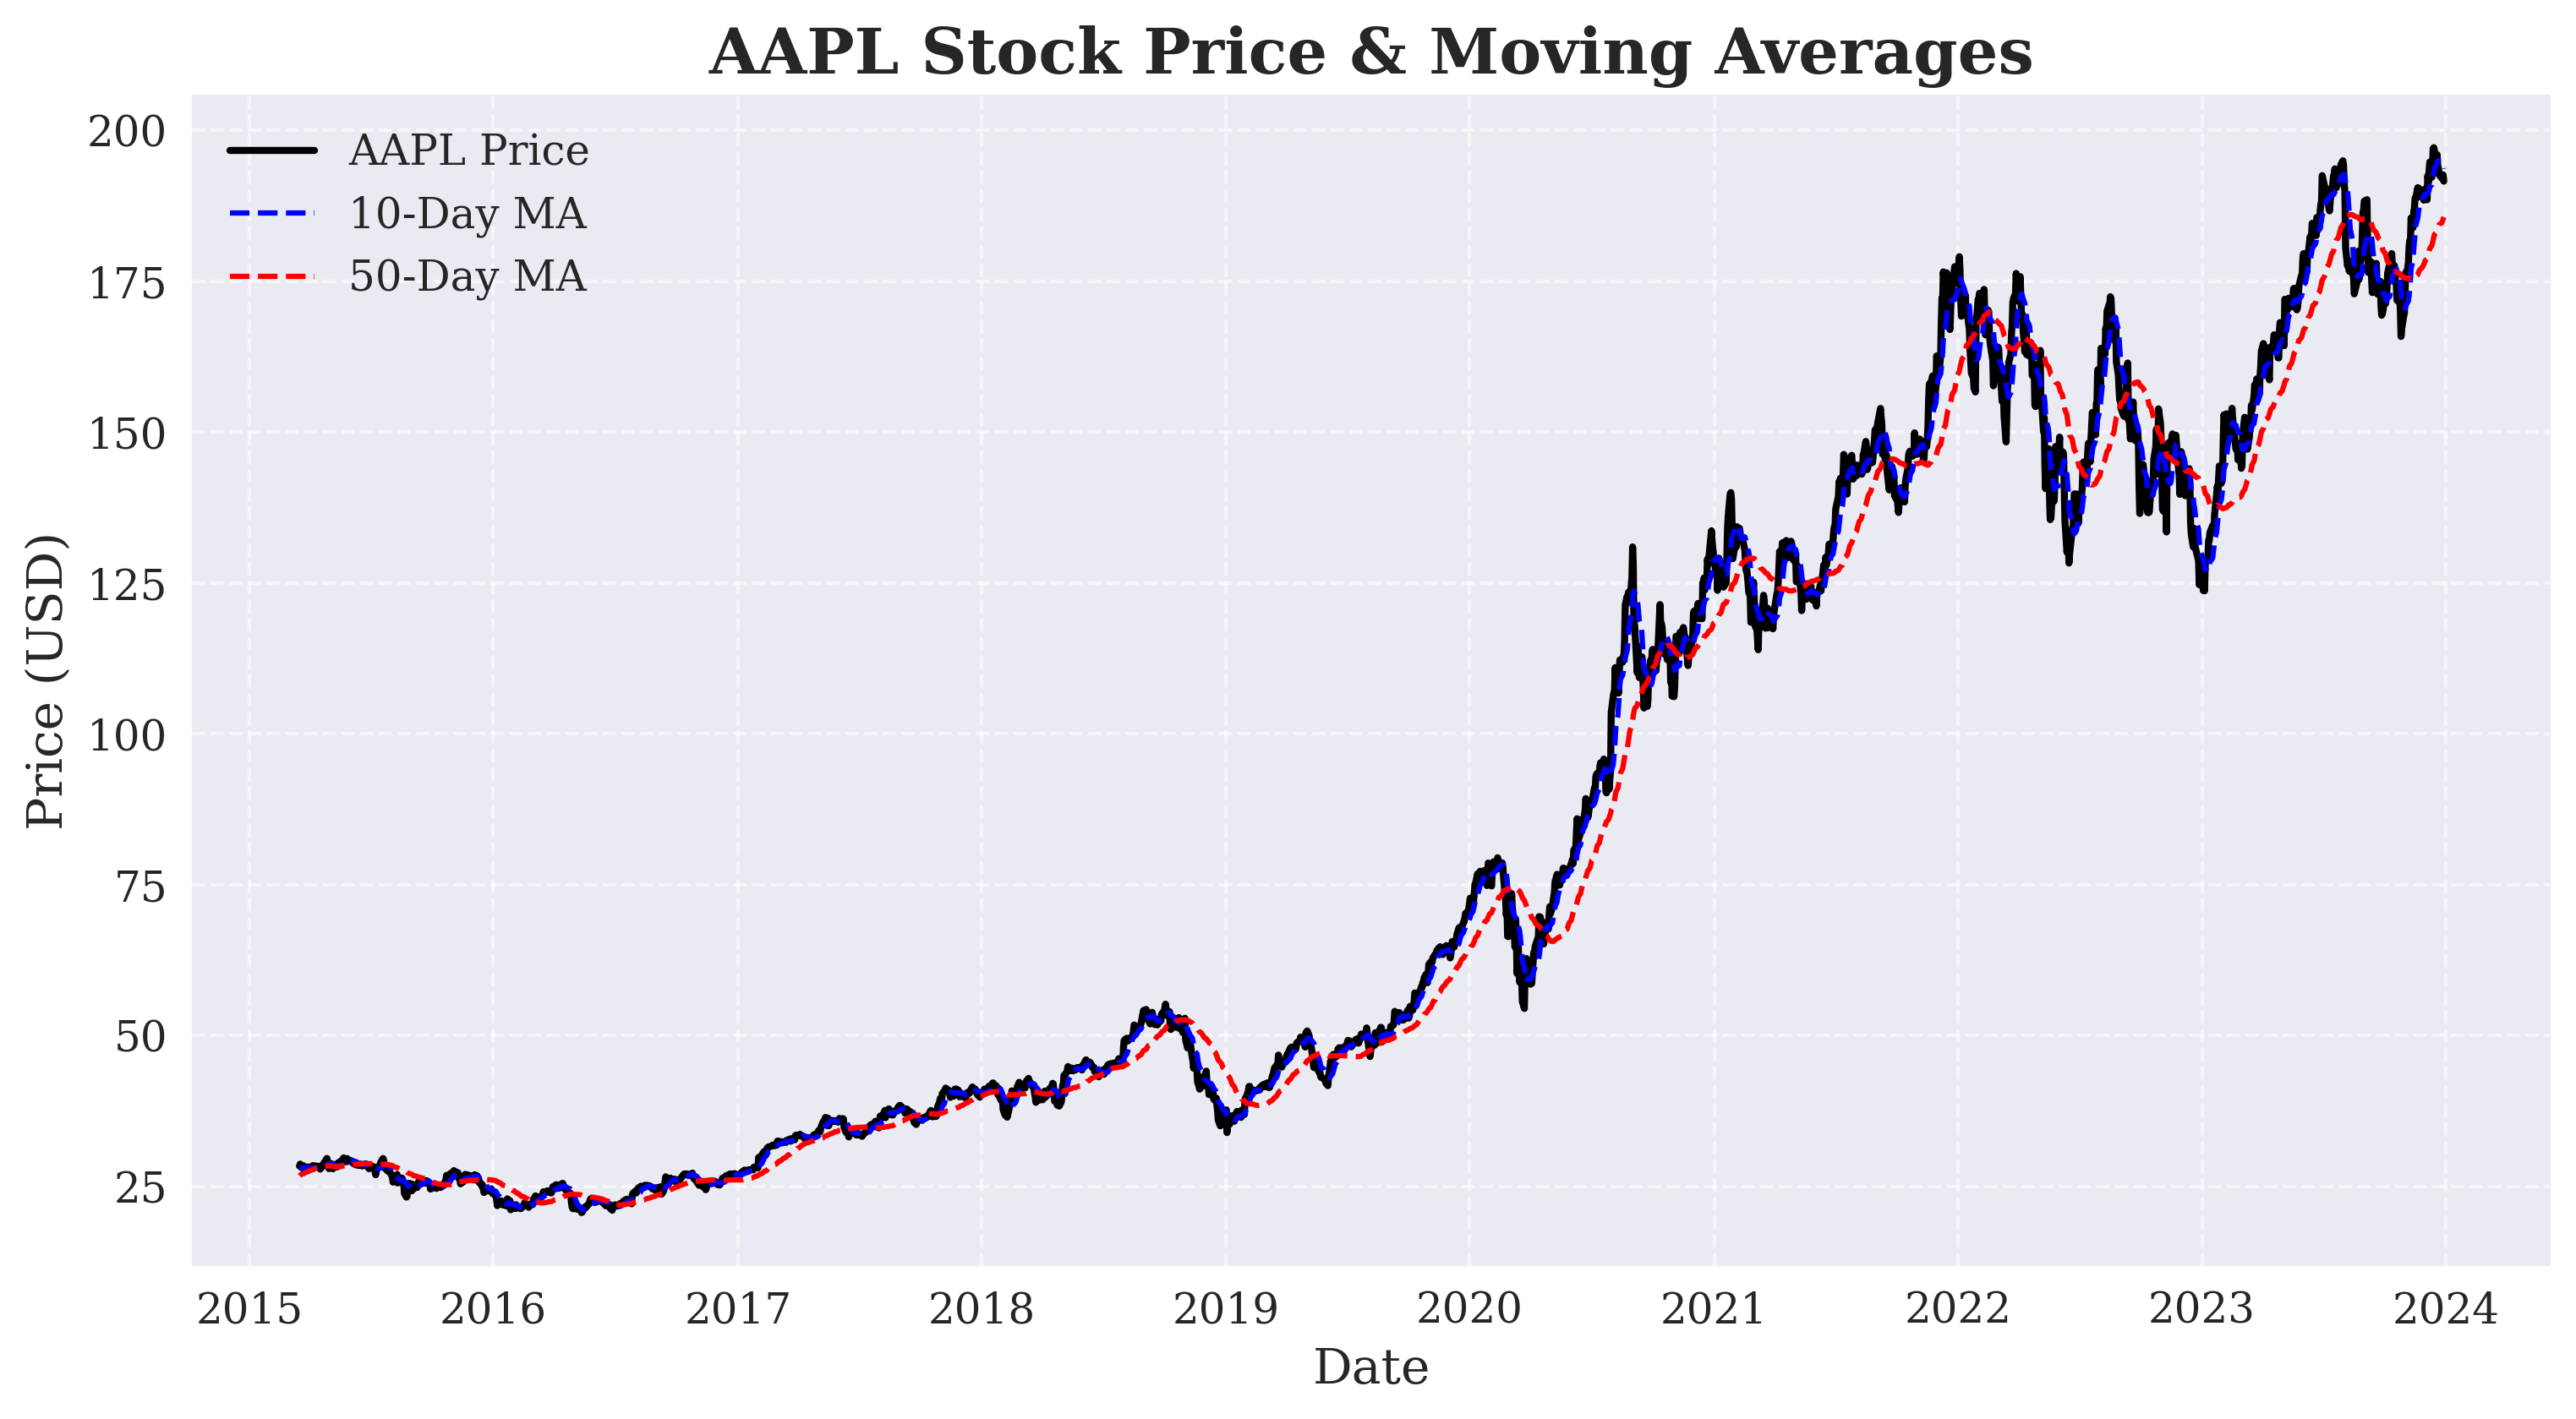

In [9]:
# Plot price trends with moving averages
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(df['Price'], label=f'{ticker} Price', linewidth=2, color="black")
plt.plot(df['MA_10'], label='10-Day MA', linestyle='dashed', linewidth=1.5, color="blue")
plt.plot(df['MA_50'], label='50-Day MA', linestyle='dashed', linewidth=1.5, color="red")
plt.title(f"{ticker} Stock Price & Moving Averages", fontsize=18, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### 📊 (B) Daily Return Distribution

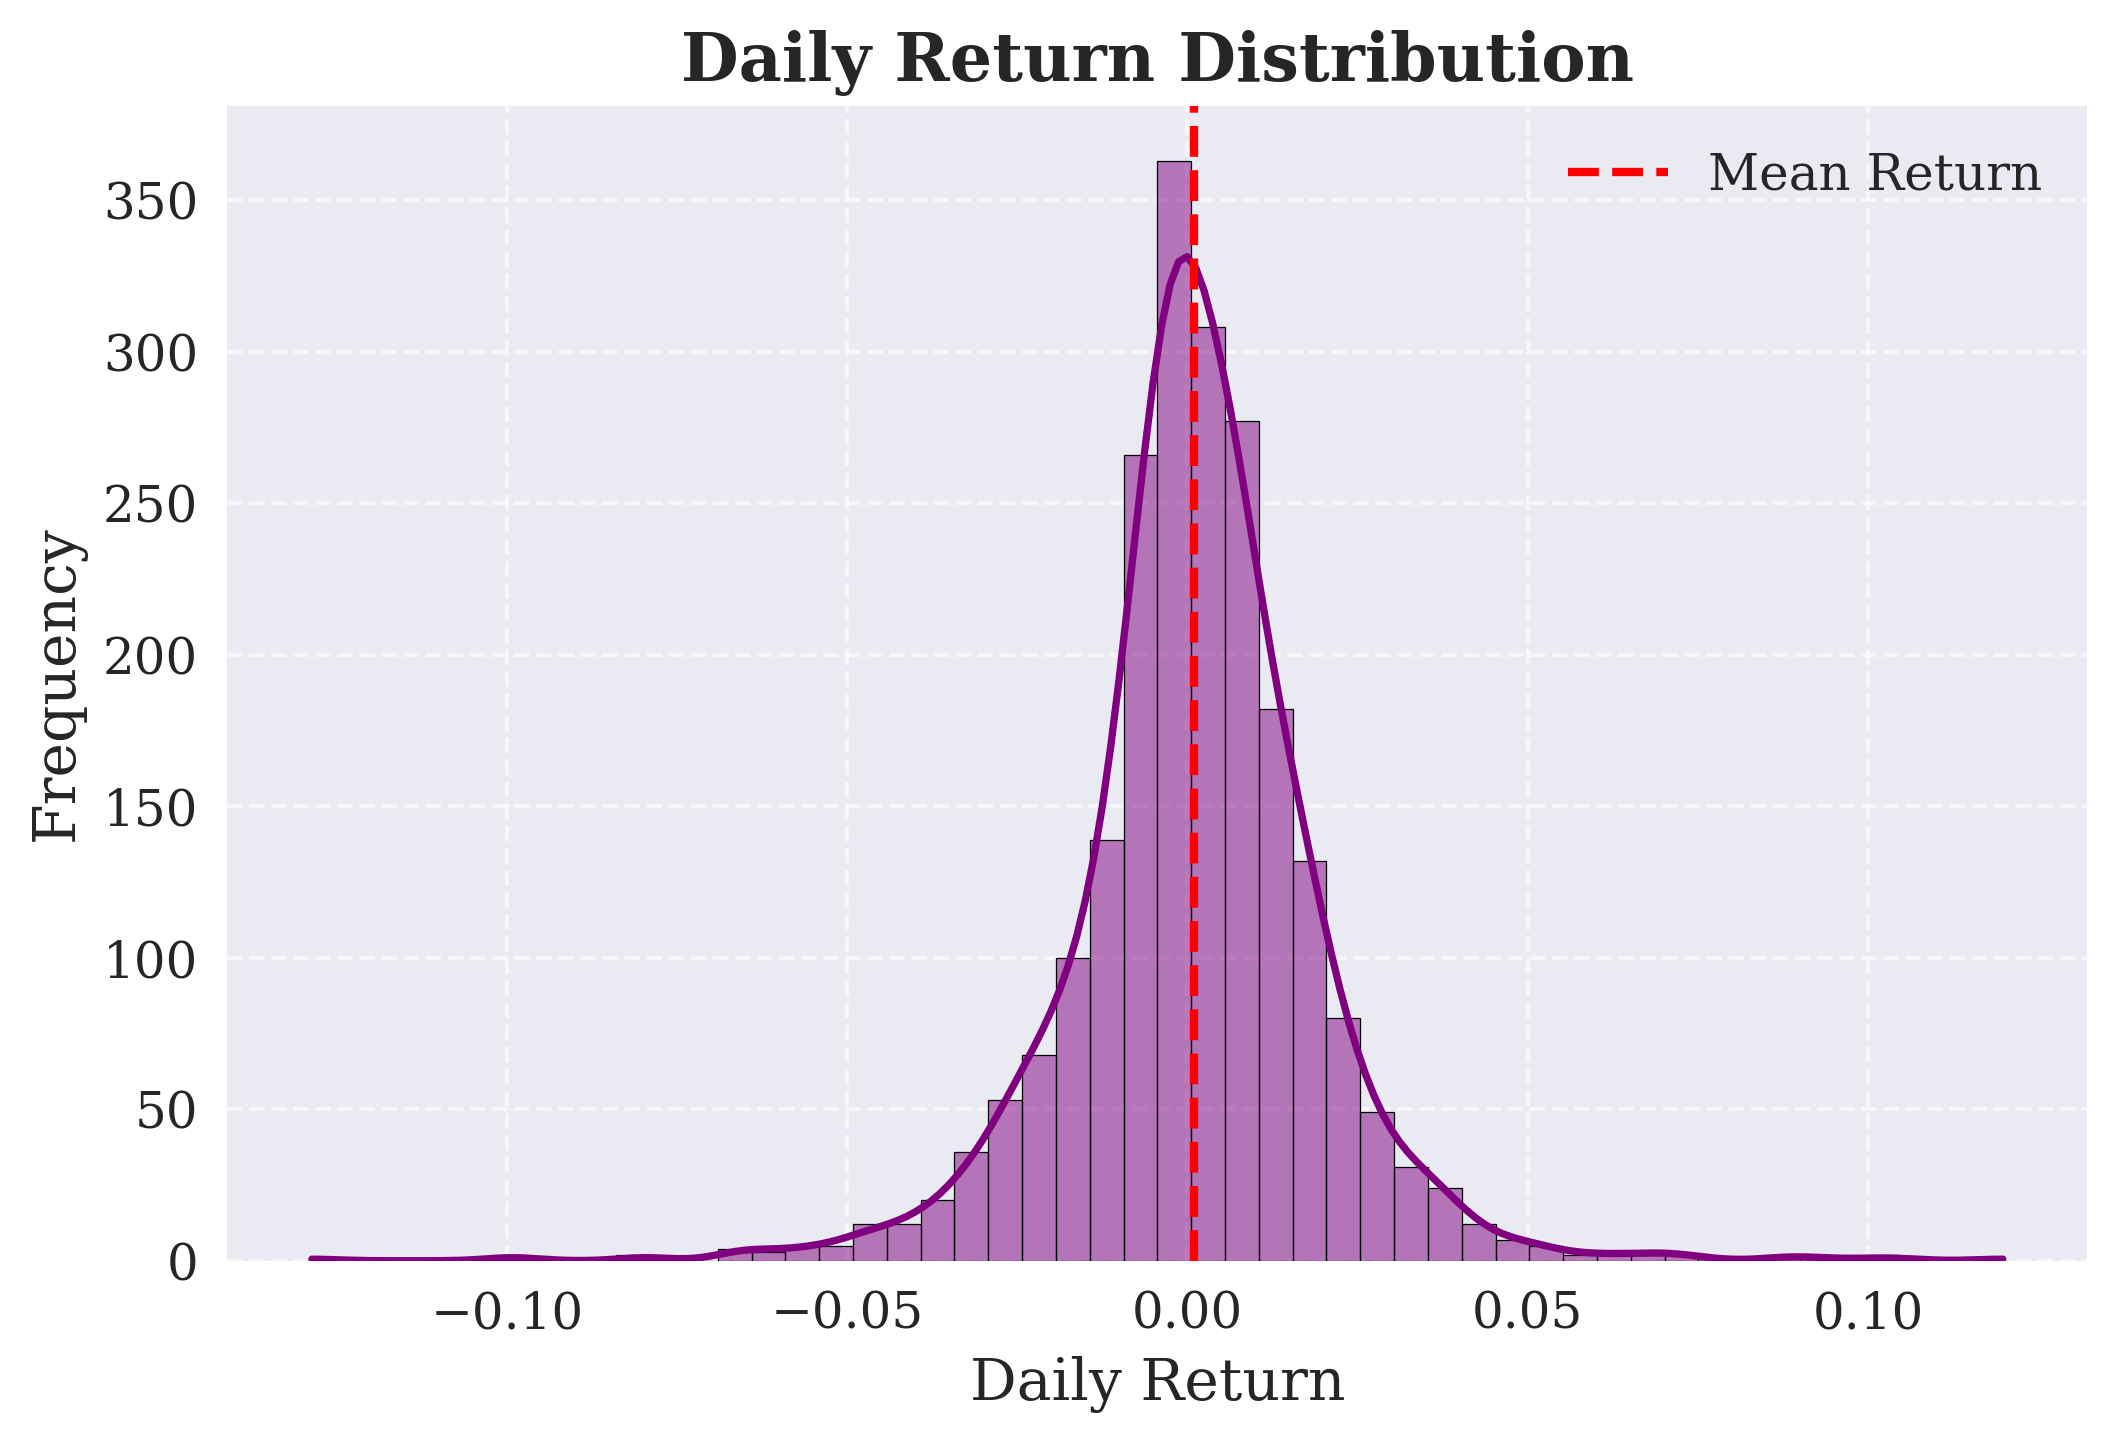

In [10]:
# Plot Daily Return Distribution
plt.figure(figsize=(8, 5), dpi=300)
sns.histplot(df['Daily Return'], bins=50, kde=True, color="purple")
plt.axvline(df['Daily Return'].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean Return")
plt.title("Daily Return Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### 📊 (C) Correlation Heatmap

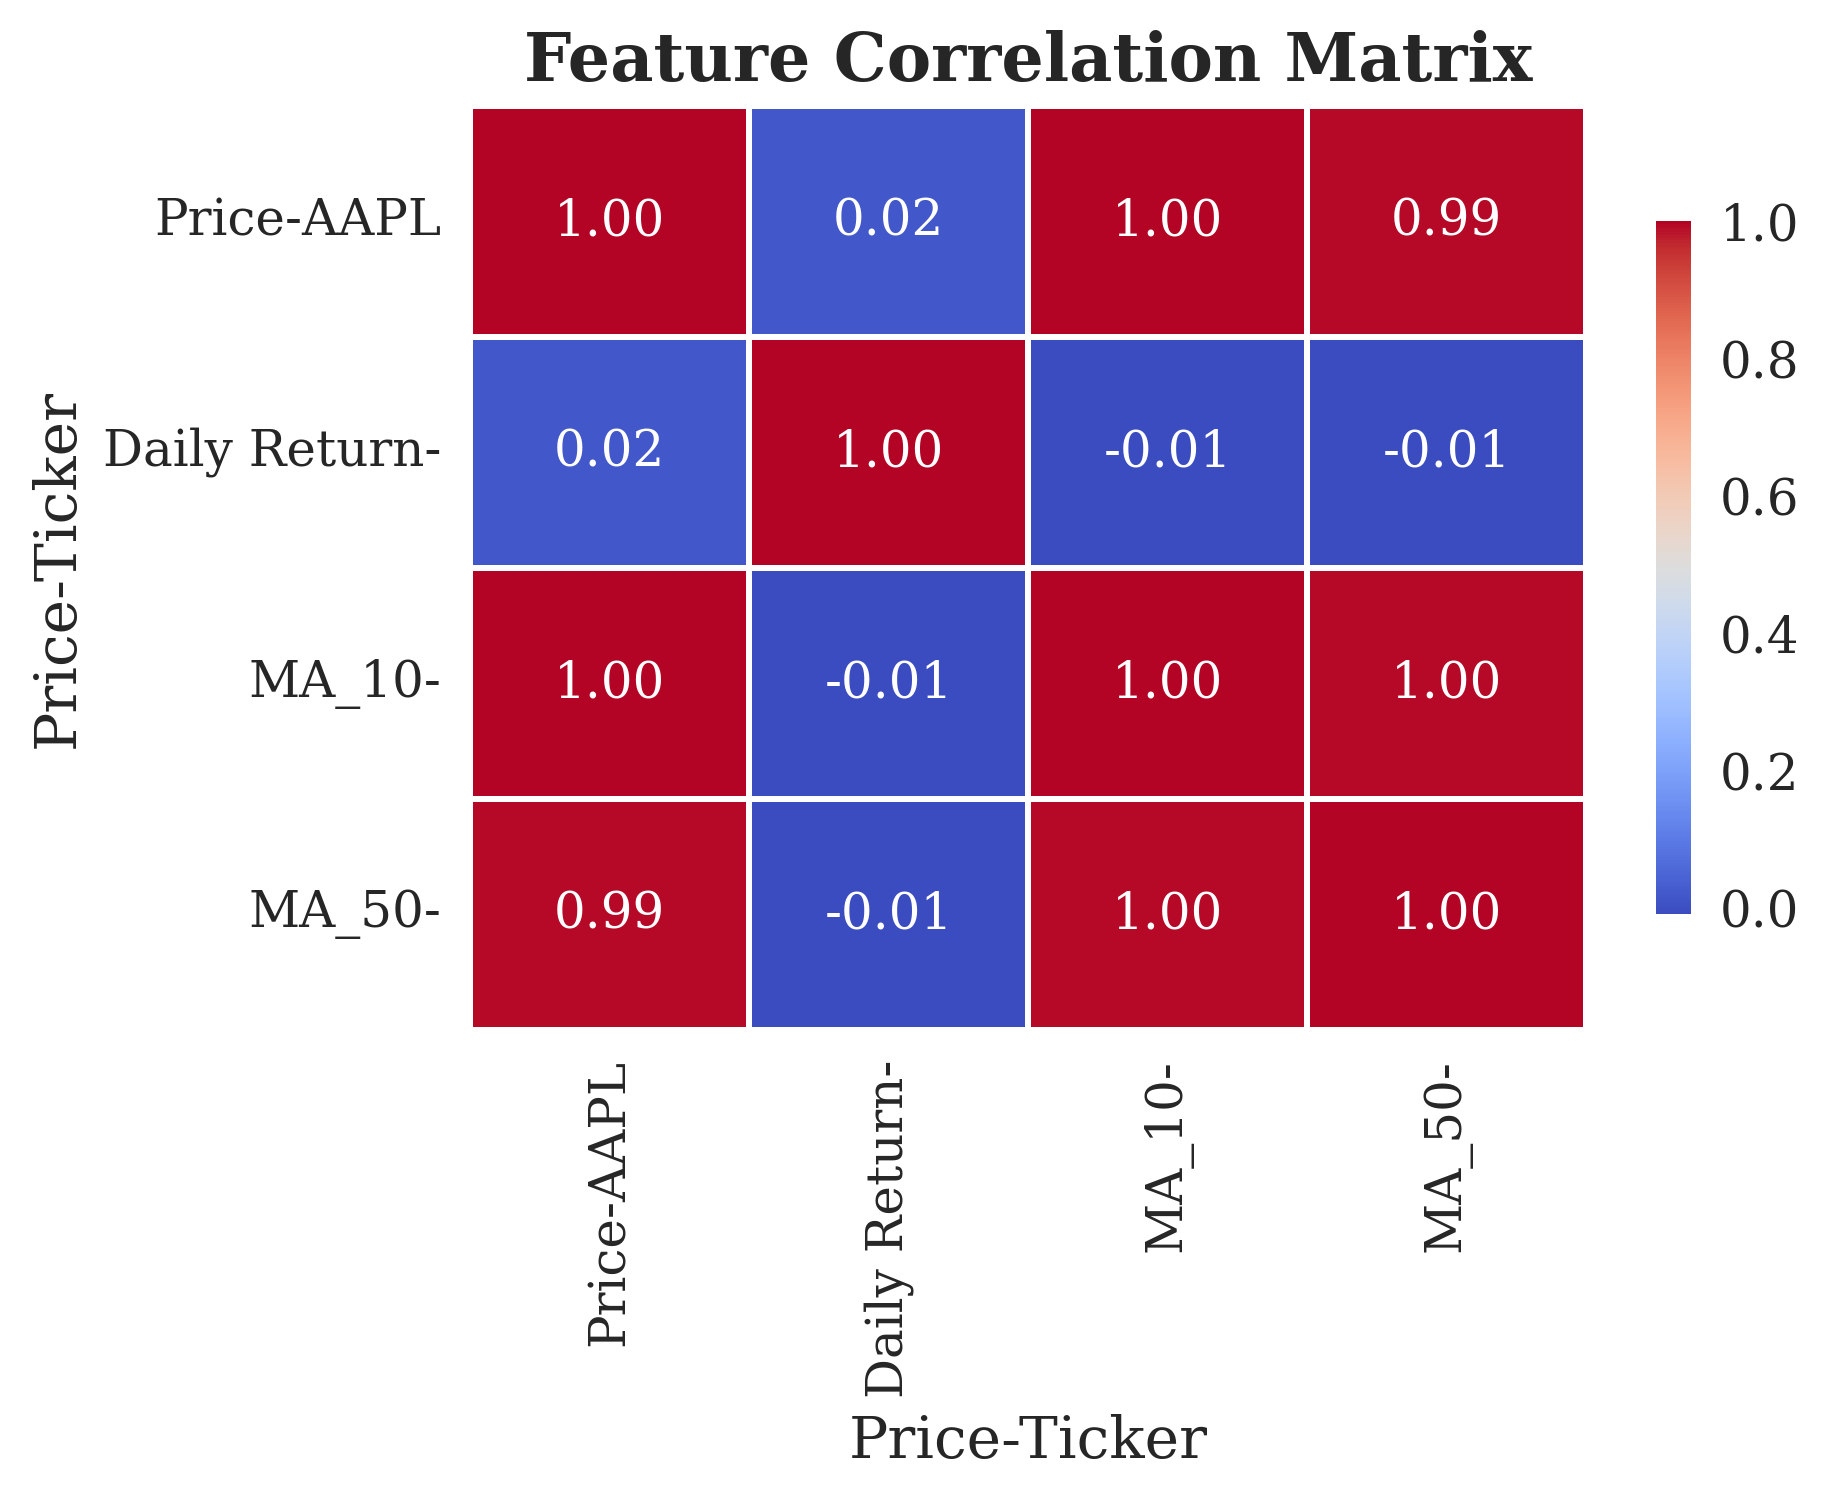

In [11]:
# Correlation heatmap
plt.figure(figsize=(6, 4), dpi=300)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, cbar_kws={'shrink': 0.75})
plt.title("Feature Correlation Matrix", fontsize=16, fontweight='bold')
plt.show()


### 📌 **5. AutoML Analysis (PyCaret)**

In [14]:
# Check the index levels
print("Index Levels:", df.index.nlevels)

# Print first few rows to inspect structure
print(df.head())


Index Levels: 1
Price           Price Daily Return      MA_10      MA_50 Lagged_Return
Ticker           AAPL                                                 
Date                                                                  
2015-03-19  28.505583    -0.007550  28.091750  26.986422      0.011256
2015-03-20  28.147869    -0.012549  28.076100  27.069473     -0.007550
2015-03-23  28.440748     0.010405  28.077665  27.139943     -0.012549
2015-03-24  28.324493    -0.004088  28.126403  27.207553      0.010405
2015-03-25  27.584461    -0.026127  28.151890  27.272655     -0.004088


In [15]:
# Reset index to remove multi-level issues
df = df.reset_index()

# Ensure all column names are valid
print("\nUpdated DataFrame Columns:", df.columns)



Updated DataFrame Columns: MultiIndex([(         'Date',     ''),
            (        'Price', 'AAPL'),
            ( 'Daily Return',     ''),
            (        'MA_10',     ''),
            (        'MA_50',     ''),
            ('Lagged_Return',     '')],
           names=['Price', 'Ticker'])


In [17]:
# Flatten MultiIndex Columns by joining levels with an underscore
df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

# Print updated column names
print("\nUpdated DataFrame Columns (Flattened):", df.columns)



Updated DataFrame Columns (Flattened): Index(['Date_', 'Price_AAPL', 'Daily Return_', 'MA_10_', 'MA_50_',
       'Lagged_Return_'],
      dtype='object')


In [19]:
# Rename columns to remove unwanted underscores and ensure compatibility
df.rename(columns={
    'Date_': 'Date',
    'Price_AAPL': 'Price',
    'Daily Return_': 'Daily Return',
    'MA_10_': 'MA_10',
    'MA_50_': 'MA_50',
    'Lagged_Return_': 'Lagged_Return'
}, inplace=True)

# Print final DataFrame structure before running PyCaret
print("\nFinal DataFrame Columns:", df.columns)



Final DataFrame Columns: Index(['Date', 'Price', 'Daily Return', 'MA_10', 'MA_50', 'Lagged_Return'], dtype='object')


In [20]:
from pycaret.regression import setup, compare_models

# Ensure lagged return feature exists
df['Lagged_Return'] = df['Daily Return'].shift(1)
df.dropna(inplace=True)

# Reset index to avoid PyCaret errors
df = df.reset_index()

# Flatten MultiIndex Columns
df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

# Rename Columns for PyCaret Compatibility
df.rename(columns={
    'Date_': 'Date',
    'Price_AAPL': 'Price',
    'Daily Return_': 'Daily Return',
    'MA_10_': 'MA_10',
    'MA_50_': 'MA_50',
    'Lagged_Return_': 'Lagged_Return'
}, inplace=True)

# Print final DataFrame structure before running PyCaret
print("\nFinal DataFrame Structure:\n", df.head())

# Run PyCaret AutoML
exp = setup(df, target='Daily Return', session_id=42, verbose=False)
best_model = compare_models()



Final DataFrame Structure:
    index       Date      Price  Daily Return      MA_10      MA_50  \
0      1 2015-03-23  28.440748      0.010405  28.077665  27.139943   
1      2 2015-03-24  28.324493     -0.004088  28.126403  27.207553   
2      3 2015-03-25  27.584461     -0.026127  28.151890  27.272655   
3      4 2015-03-26  27.776739      0.006971  28.147196  27.337282   
4      5 2015-03-27  27.555407     -0.007968  28.139596  27.399354   

   Lagged_Return  
0      -0.012549  
1       0.010405  
2      -0.004088  
3      -0.026127  
4       0.006971  


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0112,0.0003,0.0158,0.2574,0.0137,2.0672,0.0320
lr,Linear Regression,0.0113,0.0003,0.0158,0.2560,0.0137,2.1017,0.6360
ridge,Ridge Regression,0.0114,0.0003,0.0160,0.2320,0.0143,1.8903,0.0310
huber,Huber Regressor,0.0116,0.0003,0.0164,0.2002,0.0145,1.8791,0.0870
lightgbm,Light Gradient Boosting Machine,0.0130,0.0003,0.0179,0.0385,0.0142,2.7446,1.6050
gbr,Gradient Boosting Regressor,0.0128,0.0003,0.0180,0.0269,0.0159,1.6644,0.3330
rf,Random Forest Regressor,0.0131,0.0003,0.0182,0.0084,0.0153,2.2782,1.3090
llar,Lasso Least Angle Regression,0.0129,0.0003,0.0184,-0.0131,0.0176,1.0845,0.0320
lasso,Lasso Regression,0.0129,0.0003,0.0184,-0.0131,0.0176,1.0845,0.0350
en,Elastic Net,0.0129,0.0003,0.0184,-0.0131,0.0176,1.0845,0.0320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]